# TensorFlow Lite Object Detection in Python

In [1]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="ssd_mobilenet_v1_1_metadata_1.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'normalized_input_image_tensor',
  'index': 175,
  'shape': array([  1, 300, 300,   3], dtype=int32),
  'shape_signature': array([  1, 300, 300,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [2]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'TFLite_Detection_PostProcess',
  'index': 167,
  'shape': array([ 1, 10,  4], dtype=int32),
  'shape_signature': array([ 1, 10,  4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:1',
  'index': 168,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([ 1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:2',
  'index': 169,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([ 1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': 

In [3]:
from PIL import Image

# im = Image.open("cats.jpg")
# im = Image.open("umbrella.jpg")
im = Image.open("safari.jpg")

(1200, 800)


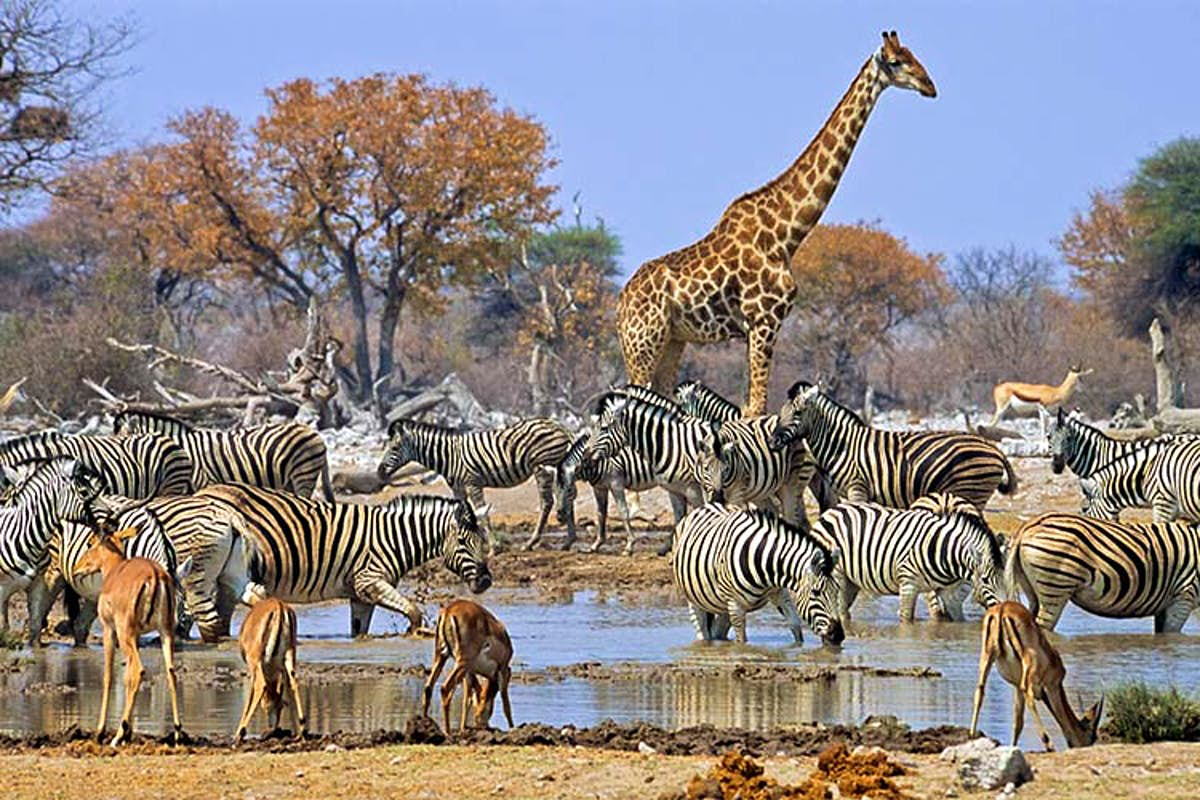

In [4]:
print(im.size)
im

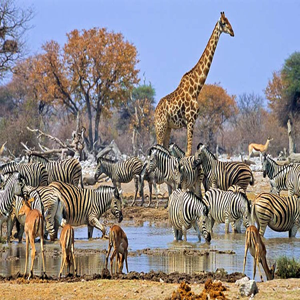

In [5]:
res_im = im.resize((300, 300))
res_im

In [6]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im).astype('uint8')
np_res_im

array([[[138, 145, 201],
        [138, 172, 213],
        [143, 170, 216],
        ...,
        [152, 180, 245],
        [153, 181, 246],
        [153, 181, 246]],

       [[139, 150, 204],
        [131, 163, 202],
        [137, 161, 204],
        ...,
        [152, 180, 245],
        [152, 180, 245],
        [152, 180, 245]],

       [[147, 164, 218],
        [133, 163, 201],
        [145, 165, 207],
        ...,
        [150, 178, 243],
        [151, 179, 244],
        [151, 179, 244]],

       ...,

       [[188, 143,  78],
        [197, 154,  91],
        [204, 162, 105],
        ...,
        [227, 200, 147],
        [228, 200, 150],
        [216, 187, 137]],

       [[201, 156,  89],
        [205, 163,  99],
        [213, 175, 116],
        ...,
        [208, 184, 118],
        [193, 168, 104],
        [213, 187, 125]],

       [[198, 150,  85],
        [225, 182, 119],
        [210, 172, 114],
        ...,
        [187, 156,  96],
        [160, 130,  72],
        [164, 134,  77]]

In [7]:
input_details[0]['shape']

array([  1, 300, 300,   3], dtype=int32)

In [8]:
np_res_im.shape

(300, 300, 3)

In [9]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
outputLocations = interpreter.get_tensor(output_details[0]['index'])
print(outputLocations.shape)
outputClasses = interpreter.get_tensor(output_details[1]['index'])
print(outputClasses.shape)
outputScores = interpreter.get_tensor(output_details[2]['index'])
print(outputScores.shape)
numDetections = interpreter.get_tensor(output_details[3]['index'])
print(numDetections.shape)

(1, 10, 4)
(1, 10)
(1, 10)
(1,)


In [10]:
# Got the labelmap.txt file from
# TFLite_examples/lite/examples/object_detection/android/app/src/main/assets

In [11]:
label_names = [line.rstrip('\n') for line in open("labelmap.txt")]
label_names = np.array(label_names)

In [12]:
numDetectionsOutput = int(np.minimum(numDetections[0],10))
numDetectionsOutput

10

Output class: giraffe | Confidence: 0.82421875


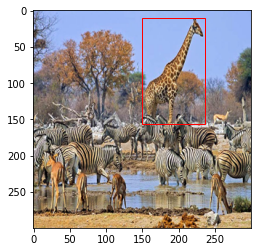

Output class: zebra | Confidence: 0.7109375


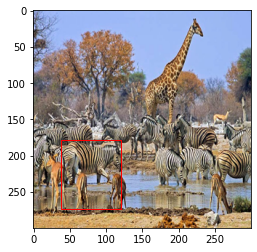

Output class: zebra | Confidence: 0.65625


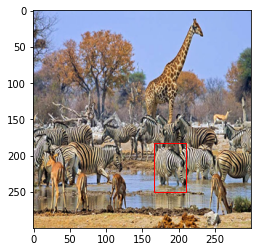

Output class: zebra | Confidence: 0.57421875


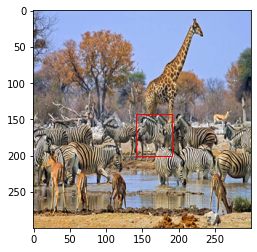

Output class: horse | Confidence: 0.5625


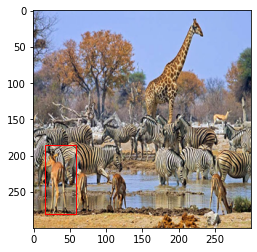

Output class: zebra | Confidence: 0.5625


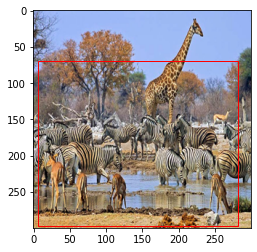

Output class: zebra | Confidence: 0.5625


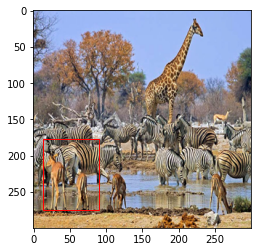

Output class: zebra | Confidence: 0.5390625


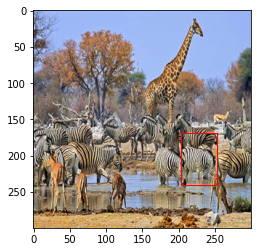

Output class: horse | Confidence: 0.51171875


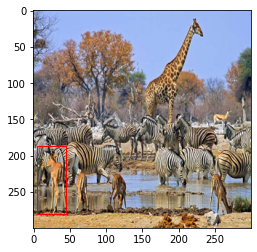

Output class: zebra | Confidence: 0.5


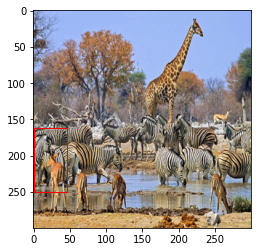

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

for i in range(numDetectionsOutput):
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(res_im)

    # Create a Rectangle patch
    inputSize = 300
    left = outputLocations[0][i][1] * inputSize
    top = outputLocations[0][i][0] * inputSize
    right = outputLocations[0][i][3] * inputSize
    bottom = outputLocations[0][i][2] * inputSize
    class_name = label_names[int(outputClasses[0][i])]
    print("Output class: "+class_name+" | Confidence: "+ str(outputScores[0][i]))
    rect = patches.Rectangle((left, bottom), right-left, top-bottom, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()